# 04 - Infonuagique 1 - Atelier #1

### Importation des bibliothèques

In [4]:
import io
import os
from google.cloud import vision

from utils import display_objects_results, display_image

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Affichage de l'image

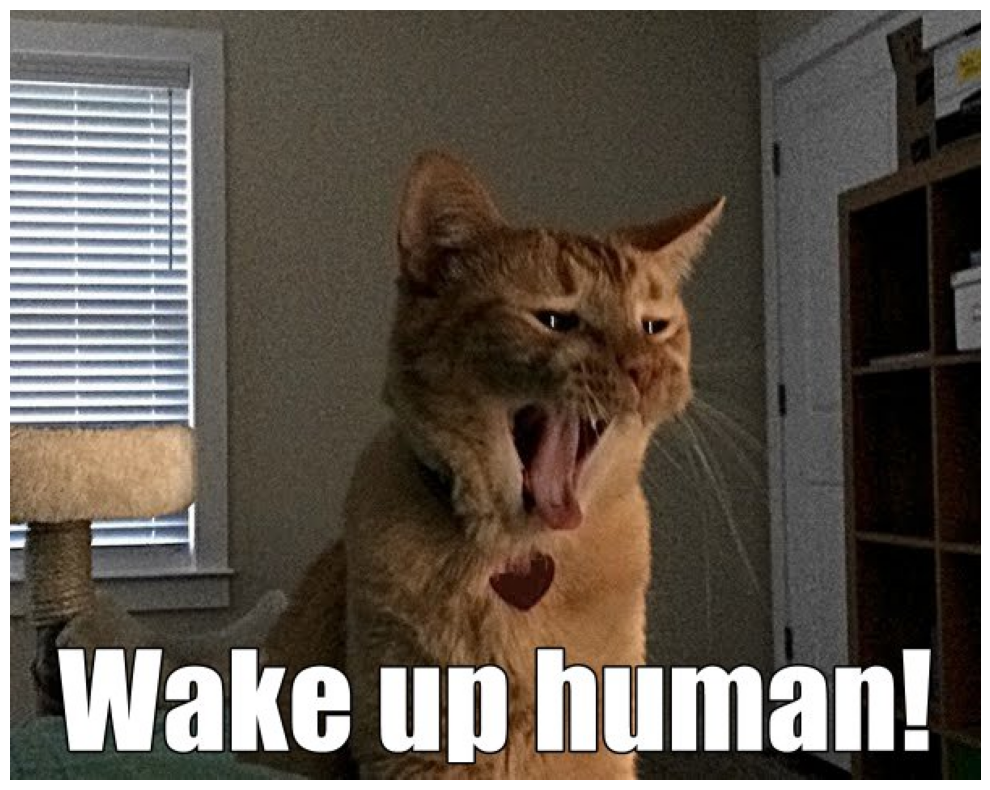

In [7]:
_ = display_image('wakeupcat.jpg')

### Instanciation du client

In [11]:
!ls /home/cam/

Downloads  csf	desk  log.txt  nltk_data  ul


In [12]:
from google.oauth2 import service_account
client = vision.ImageAnnotatorClient(credentials=service_account.Credentials.from_service_account_file("/home/cam/csf/cleGCP/cegep04-e88c18277943.json"))

### Chargement de l'image

In [14]:
file_name = os.path.abspath('wakeupcat.jpg')

with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

### Détection des "étiquette" présentes dans l'image

In [15]:
response = client.label_detection(image=image)
labels = response.label_annotations

In [16]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Cat
Felidae
Felinae
Carnivores
Facial expression
Tooth
Snout
Whiskers
Tongue
Internet meme


### Détection d'objets

In [17]:
objects = client.object_localization(image=image).localized_object_annotations

In [18]:
print('Number of objects found: {}'.format(len(objects)))
for object_ in objects:
    print('\n{} (confidence: {})'.format(object_.name, object_.score))
    print('Normalized bounding polygon vertices: ')
    for vertex in object_.bounding_poly.normalized_vertices:
        print(' - ({}, {})'.format(vertex.x, vertex.y))

Number of objects found: 3

Cat (confidence: 0.7301663160324097)
Normalized bounding polygon vertices: 
 - (0.32421875, 0.17578125)
 - (0.75, 0.17578125)
 - (0.75, 0.9921875)
 - (0.32421875, 0.9921875)

Window blind (confidence: 0.6907492876052856)
Normalized bounding polygon vertices: 
 - (0.00023555755615234375, 0.04248046875)
 - (0.20703125, 0.04248046875)
 - (0.20703125, 0.6328125)
 - (0.00023555755615234375, 0.6328125)

Window (confidence: 0.6324541568756104)
Normalized bounding polygon vertices: 
 - (0.00023555755615234375, 0.04248046875)
 - (0.20703125, 0.04248046875)
 - (0.20703125, 0.6328125)
 - (0.00023555755615234375, 0.6328125)


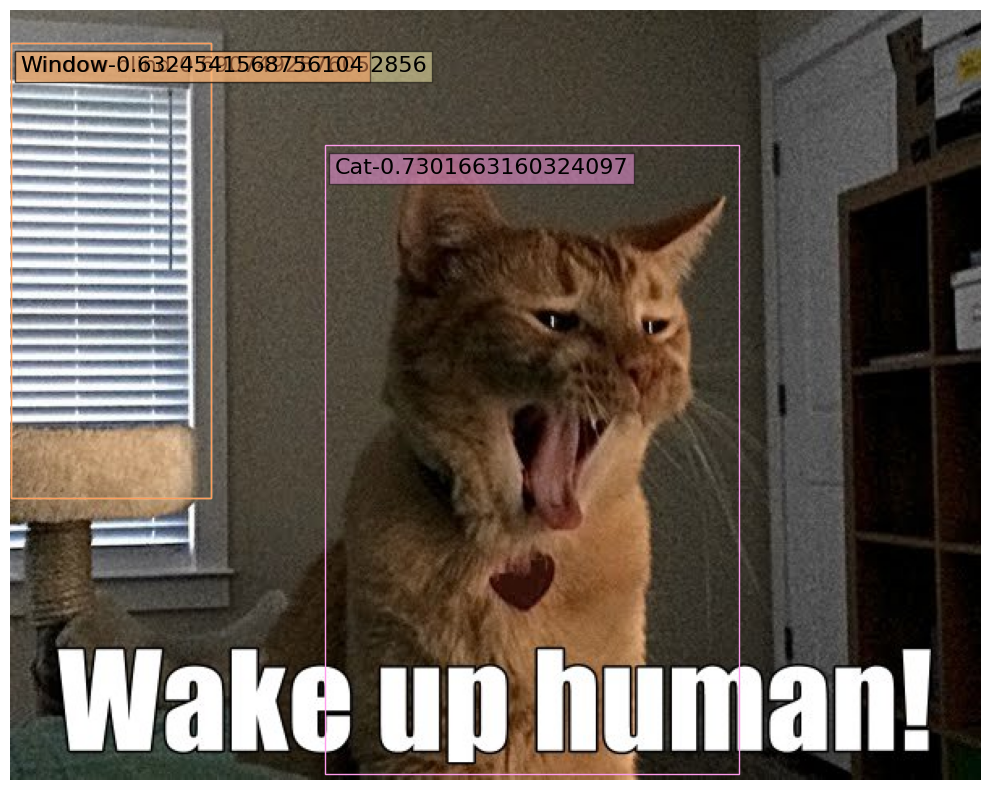

In [19]:
display_objects_results('wakeupcat.jpg', objects, 0.5)

### Avec une autre image

In [20]:
file_name = os.path.abspath('raptors.jpg')

with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

In [21]:
response = client.label_detection(image=image)
labels = response.label_annotations

In [22]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Basketball
Sports
Basketball player
Jersey
Sportswear
Tournament
Basketball moves
Sleeveless shirt
Championship
Game


In [23]:
objects = client.object_localization(image=image).localized_object_annotations

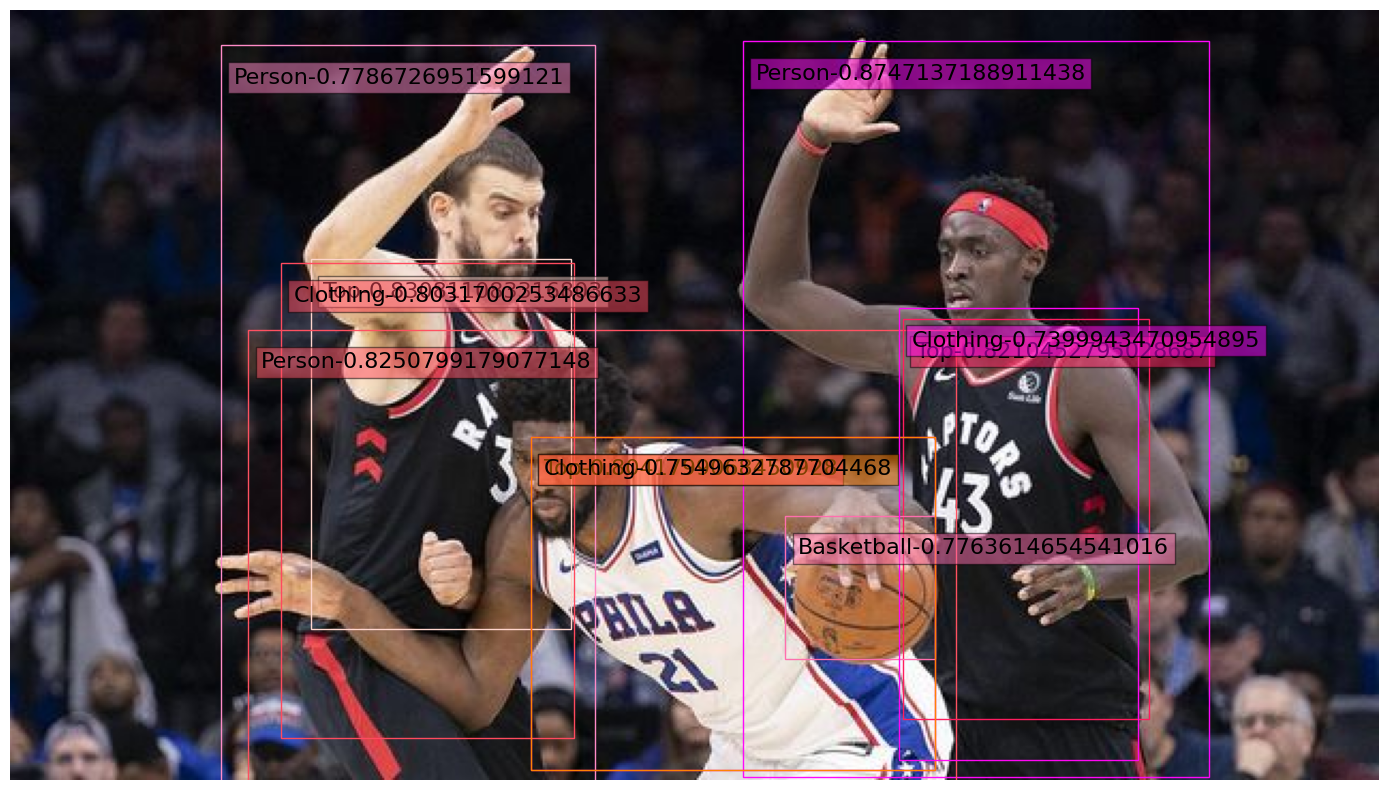

In [24]:
display_objects_results('raptors.jpg', objects, 0.5)